#### **Libraries**

In [23]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from feature_engine.selection import SelectByShuffling
from termcolor import colored, cprint

#### **Datasets and Analytics**

In [10]:
data2 = pd.read_csv(r'C:\Users\AleynaCihangir\Desktop\MarketPlace PowerBrands Projects\00_Literature\dataset_2.csv')
print(colored('Datasets Shape: ','blue'), data2.shape)

Datasets Shape:  (50000, 301)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    data2.drop(labels=['target'], axis=1),
    data2['target'],
    test_size=0.3,
    random_state=0)
print(colored('Shape for X train and X test:', 'blue'), X_train.shape, X_test.shape)

Shape for X train and X test: (35000, 108) (15000, 108)


In [28]:
rf = RandomForestClassifier(n_estimators=50, max_depth=2, random_state=2909, n_jobs=4)
sel = SelectByShuffling(
    variables=None, 
    estimator=rf,
    scoring='roc_auc', 
    threshold=0,
    cv=3, 
    random_state=1)
print(colored('Model Fit: ', 'blue'), sel.fit(X_train, y_train))
print(colored('Model Performance: ', 'blue'),sel.initial_model_performance_)
sel.performance_drifts_

Model Fit:  SelectByShuffling(estimator=RandomForestClassifier(max_depth=2, n_estimators=50,
                                                   n_jobs=4,
                                                   random_state=2909),
                  random_state=1, threshold=0)
Model Performance:  0.6854579498672484


{'var_1': 0.0,
 'var_2': -0.0002024604369629257,
 'var_3': 0.0,
 'var_4': 0.0,
 'var_5': 1.6933495959547962e-05,
 'var_6': -8.201881740943495e-05,
 'var_7': 0.00010760028479472883,
 'var_8': 0.0,
 'var_9': 0.0,
 'var_10': 5.258686384601585e-05,
 'var_11': -3.277729722928058e-05,
 'var_12': 0.0,
 'var_13': -0.00010196943289919602,
 'var_14': -2.3110891274491507e-05,
 'var_15': 0.0,
 'var_16': 0.013737763046104967,
 'var_17': -0.00016576283448843654,
 'var_18': 0.0,
 'var_19': -0.00012150727096804648,
 'var_20': 0.0,
 'var_21': 0.0002472741766194053,
 'var_22': -5.8923334229632474e-05,
 'var_23': 0.0,
 'var_24': -4.422123148661861e-06,
 'var_25': 0.0,
 'var_26': -2.6175085022561717e-05,
 'var_27': 0.0,
 'var_28': 0.0,
 'var_29': 2.673503994976567e-05,
 'var_30': -0.001490248247070114,
 'var_31': -7.53158234848561e-05,
 'var_32': 3.770014702653146e-05,
 'var_33': 0.0,
 'var_34': 0.0004493963207606866,
 'var_35': 0.0,
 'var_36': 0.0,
 'var_37': -4.3715888632611666e-05,
 'var_38': 0.0001642

<AxesSubplot:>

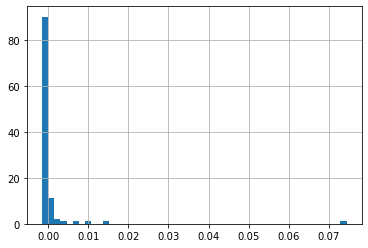

In [32]:
pd.Series(sel.performance_drifts_).hist(bins=50)

<AxesSubplot:>

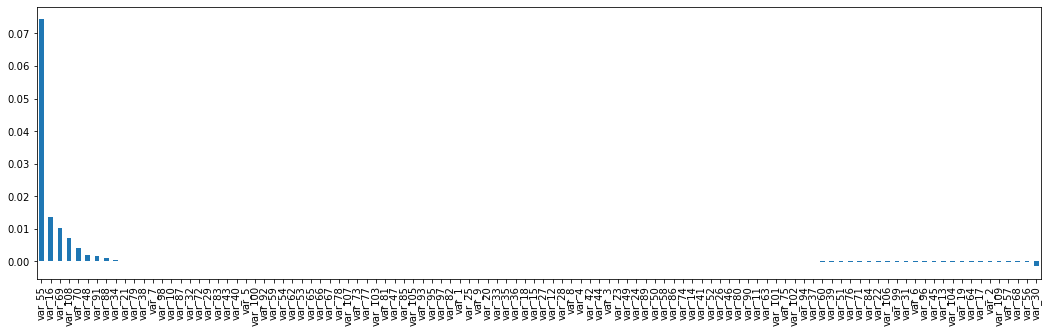

In [33]:
pd.Series(sel.performance_drifts_).sort_values(ascending=False).plot.bar(figsize=(18,5))

In [34]:
print(colored('Leng of Features Dtop:', 'blue'), len(sel.features_to_drop_))
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)
print(colored('Shape for X train and X test:', 'blue'), X_train.shape, X_test.shape)
rf.fit(X_train, y_train)
print(colored('train auc score: ', 'blue'), roc_auc_score(y_train, (rf.predict_proba(X_train))[:,1]))
print(colored('test auc score: ', 'blue'), roc_auc_score(y_test, (rf.predict_proba(X_test))[:, 1]))

Leng of Features Dtop: 101
Shape for X train and X test: (35000, 7) (15000, 7)
train auc score:  0.7010001123593995
test auc score:  0.6953477325844082
